<a href="https://colab.research.google.com/github/Anushree-15-lab/Tech_Seminar_7A/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

cnames = {
'aliceblue': '#F0F8FF',
'antiquewhite': '#FAEBD7',
'aqua': '#00FFFF',
'aquamarine': '#7FFFD4',
'azure': '#F0FFFF',
'bisque': '#FFE4C4',
'black': '#000000',
'blanchedalmond': '#FFEBCD',
'blue': '#0000FF',
'blueviolet': '#8A2BE2',
'brown': '#A52A2A',
'burlywood': '#DEB887',
'cadetblue': '#5F9EA0',
'chartreuse': '#7FFF00',
'chocolate': '#D2691E',
'coral': '#FF7F50',
'cornflowerblue': '#6495ED',
'cornsilk': '#FFF8DC',
'crimson': '#DC143C',
'cyan': '#00FFFF',
'darkblue': '#00008B',
'darkcyan': '#008B8B',
'darkgoldenrod': '#B8860B',
'darkgray': '#A9A9A9',
'darkgreen': '#006400',
'darkkhaki': '#BDB76B',
'darkmagenta': '#8B008B',
'darkolivegreen': '#556B2F',
'darkorange': '#FF8C00',
'darkorchid': '#9932CC',
'darkred': '#8B0000',
'darksalmon': '#E9967A',
'darkseagreen': '#8FBC8F',
'darkslateblue': '#483D8B',
'darkslategray': '#2F4F4F',
'darkturquoise': '#00CED1',
'darkviolet': '#9400D3',
'deeppink': '#FF1493',
'deepskyblue': '#00BFFF',
'dimgray': '#696969',
'dodgerblue': '#1E90FF',
'firebrick': '#B22222',
'floralwhite': '#FFFAF0',
'forestgreen': '#228B22',
'fuchsia': '#FF00FF',
'gainsboro': '#DCDCDC',
'ghostwhite': '#F8F8FF',
'gold': '#FFD700',
'goldenrod': '#DAA520',
'gray': '#808080',
'green': '#008000',
'greenyellow': '#ADFF2F',
'honeydew': '#F0FFF0',
'hotpink': '#FF69B4',
'indianred': '#CD5C5C',
'indigo': '#4B0082',
'ivory': '#FFFFF0',
'khaki': '#F0E68C',
'lavender': '#E6E6FA',
'lavenderblush': '#FFF0F5',
'lawngreen': '#7CFC00',
'lemonchiffon': '#FFFACD',
'lightblue': '#ADD8E6',
'lightcoral': '#F08080',
'lightcyan': '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen': '#90EE90',
'lightgray': '#D3D3D3',
'lightpink': '#FFB6C1',
'lightsalmon': '#FFA07A',
'lightseagreen': '#20B2AA',
'lightskyblue': '#87CEFA',
'lightslategray': '#778899',
'lightsteelblue': '#B0C4DE',
'lightyellow': '#FFFFE0',
'lime': '#00FF00',
'limegreen': '#32CD32',
'linen': '#FAF0E6',
'magenta': '#FF00FF',
'maroon': '#800000',
'mediumaquamarine': '#66CDAA',
'mediumblue': '#0000CD',
'mediumorchid': '#BA55D3',
'mediumpurple': '#9370DB',
'mediumseagreen': '#3CB371',
'mediumslateblue': '#7B68EE',
'mediumspringgreen': '#00FA9A',
'mediumturquoise': '#48D1CC',
'mediumvioletred': '#C71585',
'midnightblue': '#191970',
'mintcream': '#F5FFFA',
'mistyrose': '#FFE4E1',
'moccasin': '#FFE4B5',
'navajowhite': '#FFDEAD',
'navy': '#000080',
'oldlace': '#FDF5E6',
'olive': '#808000',
'olivedrab': '#6B8E23',
'orange': '#FFA500',
'orangered': '#FF4500',
'orchid': '#DA70D6',
'palegoldenrod': '#EEE8AA',
'palegreen': '#98FB98',
'paleturquoise': '#AFEEEE',
'palevioletred': '#DB7093',
'papayawhip': '#FFEFD5',
'peachpuff': '#FFDAB9',
'peru': '#CD853F',
'pink': '#FFC0CB',
'plum': '#DDA0DD',
'powderblue': '#B0E0E6',
'purple': '#800080',
'red': '#FF0000',
'rosybrown': '#BC8F8F',
'royalblue': '#4169E1',
'saddlebrown': '#8B4513',
'salmon': '#FA8072',
'sandybrown': '#FAA460',
'seagreen': '#2E8B57',
'seashell': '#FFF5EE',
'sienna': '#A0522D',
'silver': '#C0C0C0',
'skyblue': '#87CEEB',
'slateblue': '#6A5ACD',
'slategray': '#708090',
'snow': '#FFFAFA',
'springgreen': '#00FF7F',
'steelblue': '#4682B4',
'tan': '#D2B48C',
'teal': '#008080',
'thistle': '#D8BFD8',
'tomato': '#FF6347',
'turquoise': '#40E0D0',
'violet': '#EE82EE',
'wheat': '#F5DEB3',
'white': '#FFFFFF',
'whitesmoke': '#F5F5F5',
'yellow': '#FFFF00',
'yellowgreen': '#9ACD32'}

colors = list(cnames.keys())

In [2]:
data=  pd.read_csv("/content/students_adaptability_level_online_education.csv")
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [3]:
data.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [4]:
data.replace("Boy","Male",inplace=True)
data.replace("Girl","Female",inplace=True)
data.replace("Mid","Middle",inplace=True)
data.replace("Poor","Lower",inplace=True)
data.replace("Rich","Upper",inplace=True)

In [5]:
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle,Wifi,4G,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle,Wifi,4G,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,16-20,College,Non Government,No,Yes,Low,Middle,Wifi,4G,1-3,No,Mobile,Low
1201,Female,16-20,College,Non Government,No,No,High,Middle,Wifi,4G,3-6,No,Mobile,Moderate
1202,Male,11-15,School,Non Government,No,Yes,Low,Middle,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Female,16-20,College,Non Government,No,No,Low,Middle,Wifi,4G,1-3,No,Mobile,Low


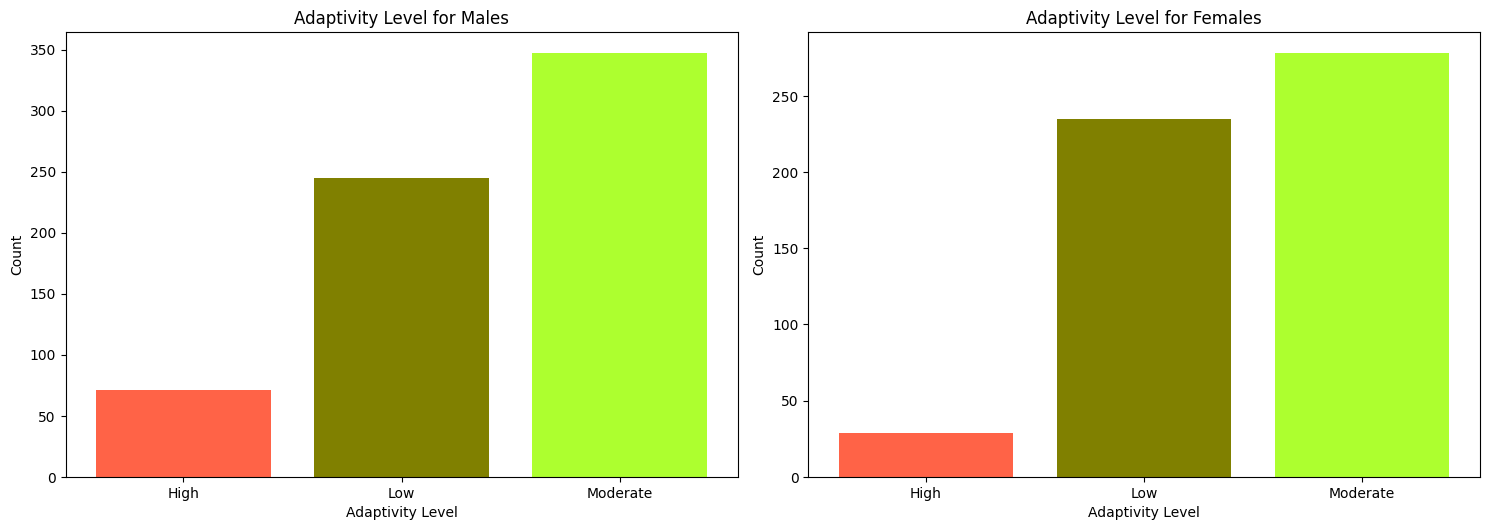

In [6]:
random.shuffle(colors)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
un, count = np.unique(data[data.Gender == "Male"]["Adaptivity Level"].values,return_counts=True)
plt.bar(un, count, color=colors)
plt.title("Adaptivity Level for Males")
plt.xlabel("Adaptivity Level")
plt.ylabel("Count")

plt.subplot(2,2,2)
un, count = np.unique(data[data.Gender == "Female"]["Adaptivity Level"].values,return_counts=True)
plt.bar(un, count, color=colors)
plt.title("Adaptivity Level for Females")
plt.xlabel("Adaptivity Level")
plt.ylabel("Count")

plt.tight_layout()

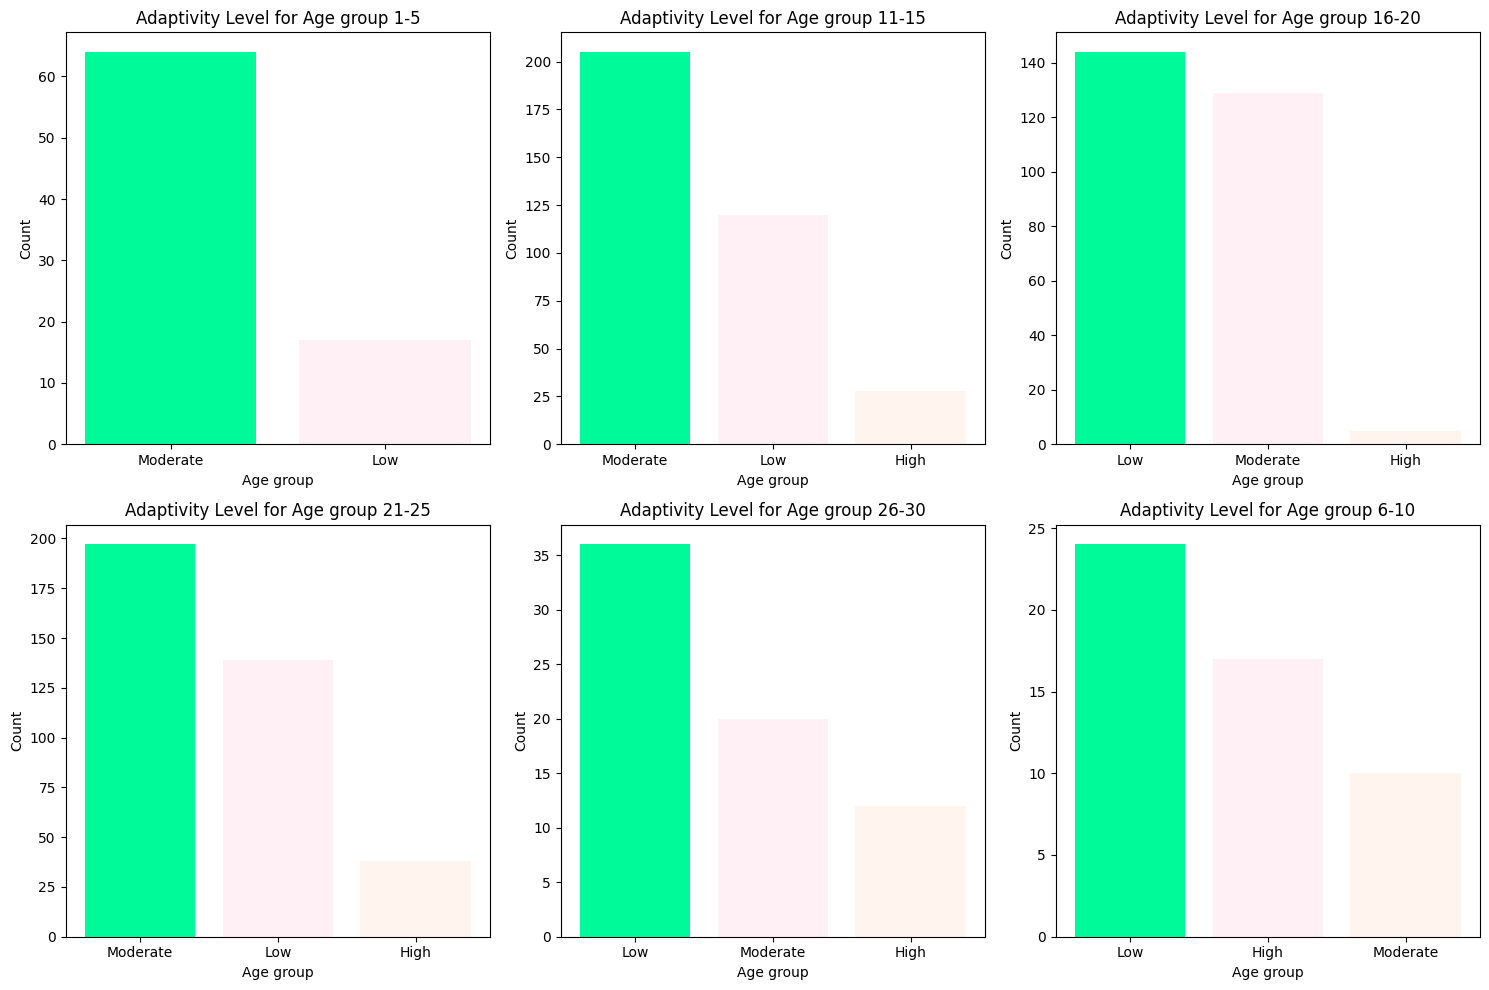

In [7]:
random.shuffle(colors)
plt.figure(figsize=(15,10))
graphs = 1
for i in np.unique(data.Age.values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data.Age == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Adaptivity Level for Age group " + i)
    plt.xlabel("Age group")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

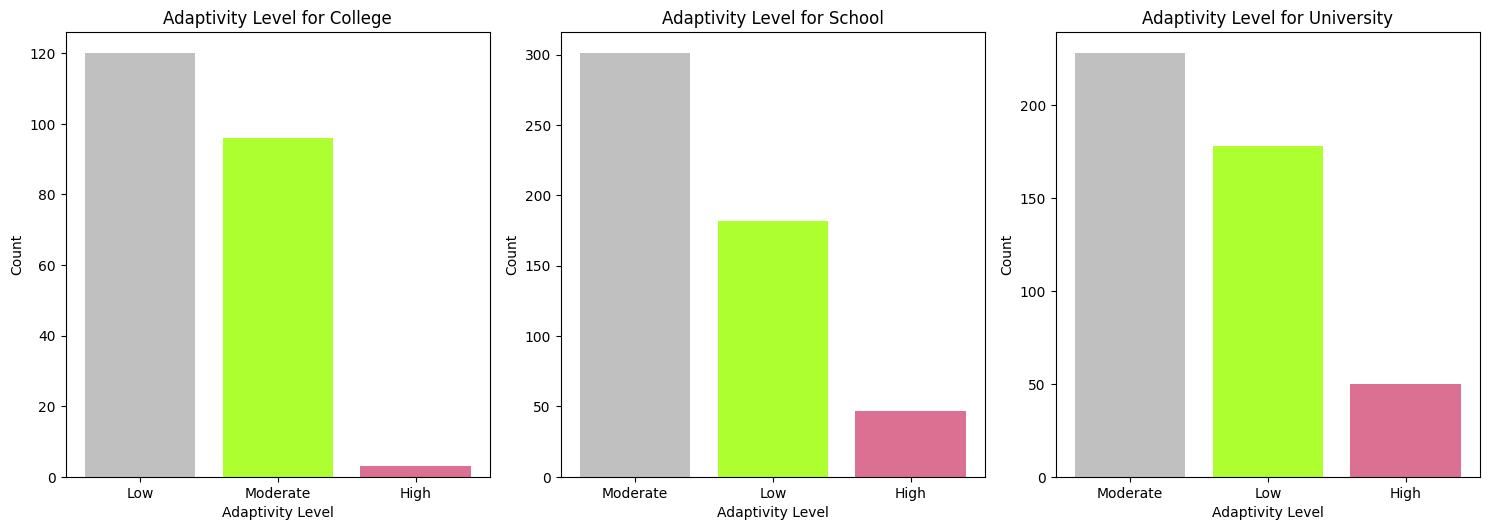

In [8]:
random.shuffle(colors)
plt.figure(figsize=(15,10))
graphs = 1
for i in np.unique(data["Education Level"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Education Level"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Adaptivity Level for " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

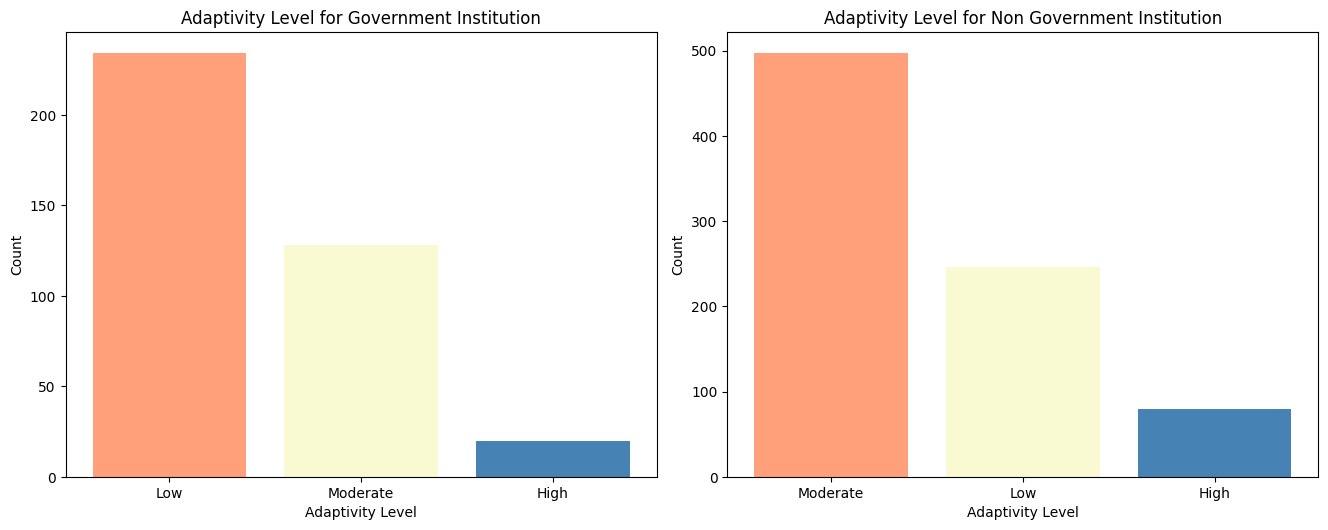

In [9]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Institution Type"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Institution Type"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Adaptivity Level for " + i + " Institution")
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

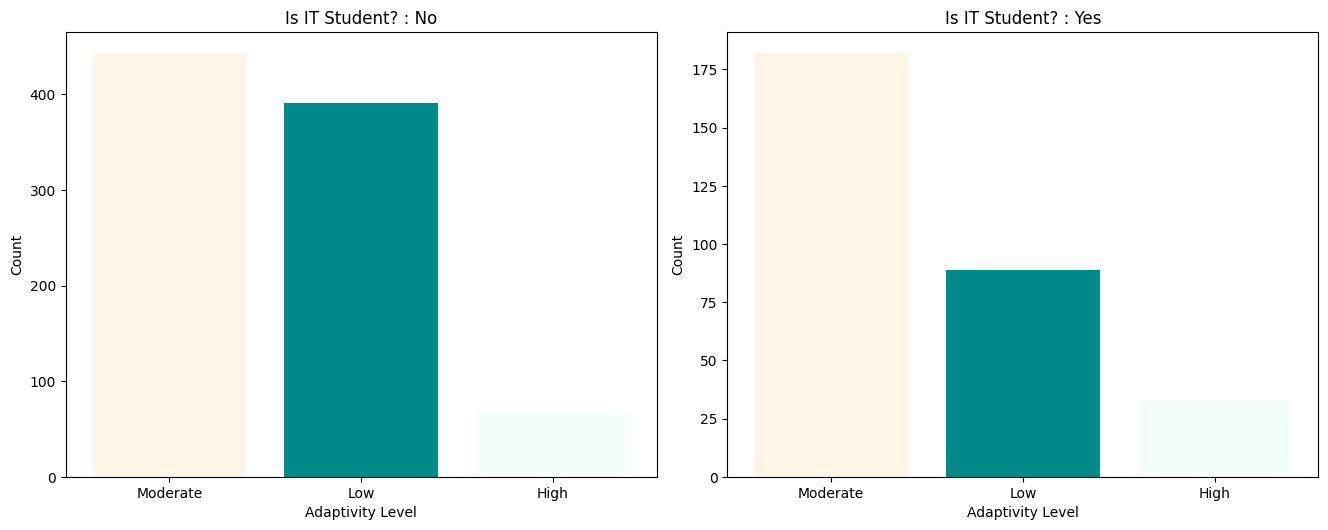

In [10]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["IT Student"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["IT Student"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Is IT Student? : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

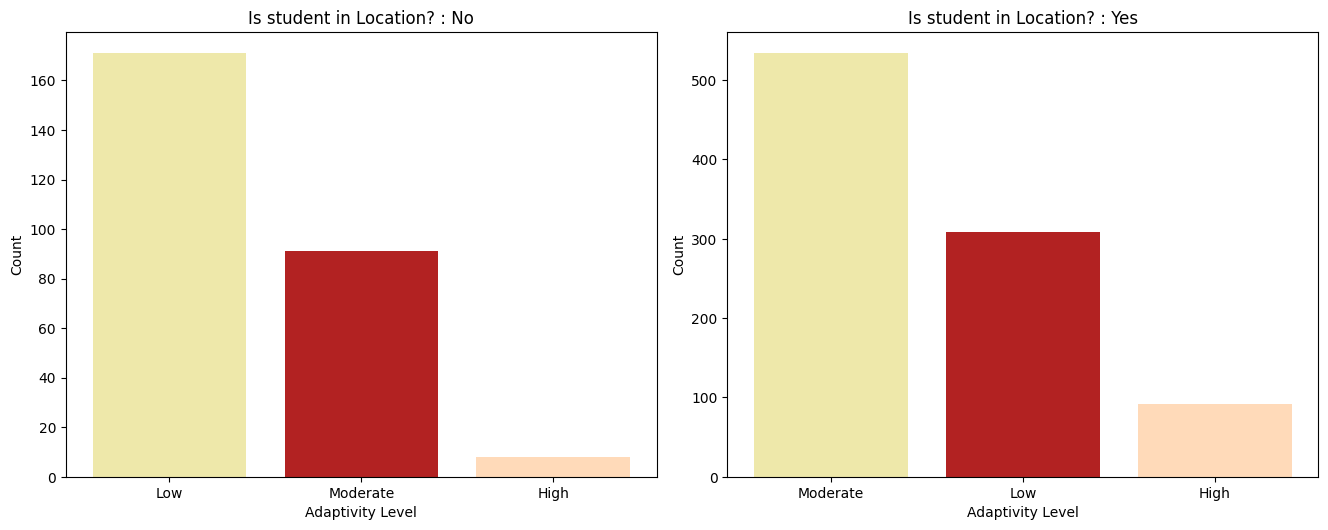

In [11]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Location"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Location"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Is student in Location? : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

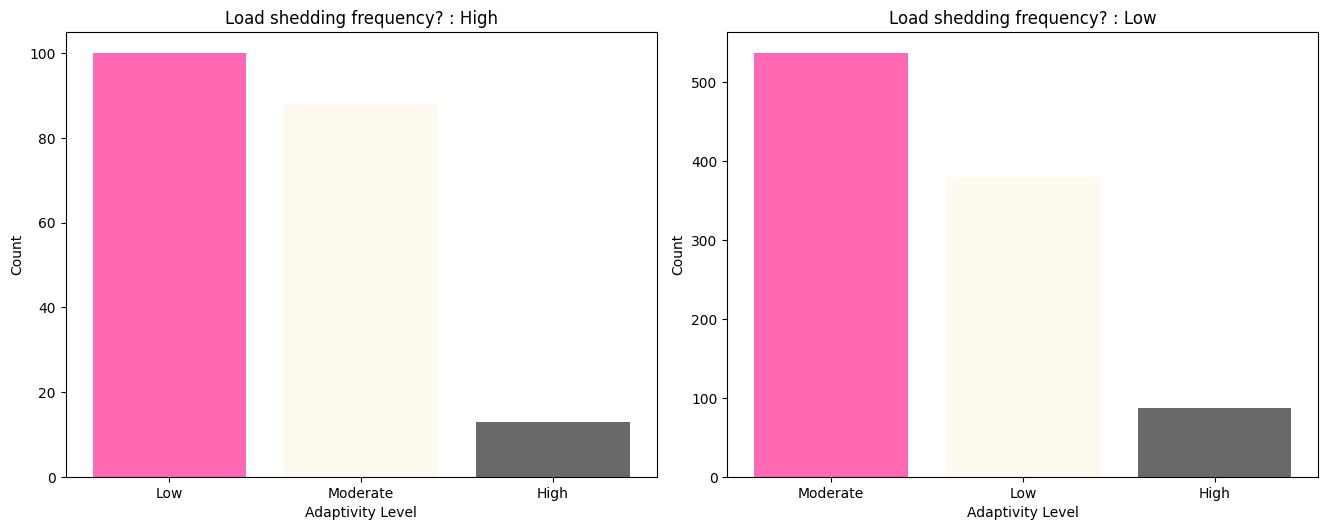

In [12]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Load-shedding"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Load-shedding"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Load shedding frequency? : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

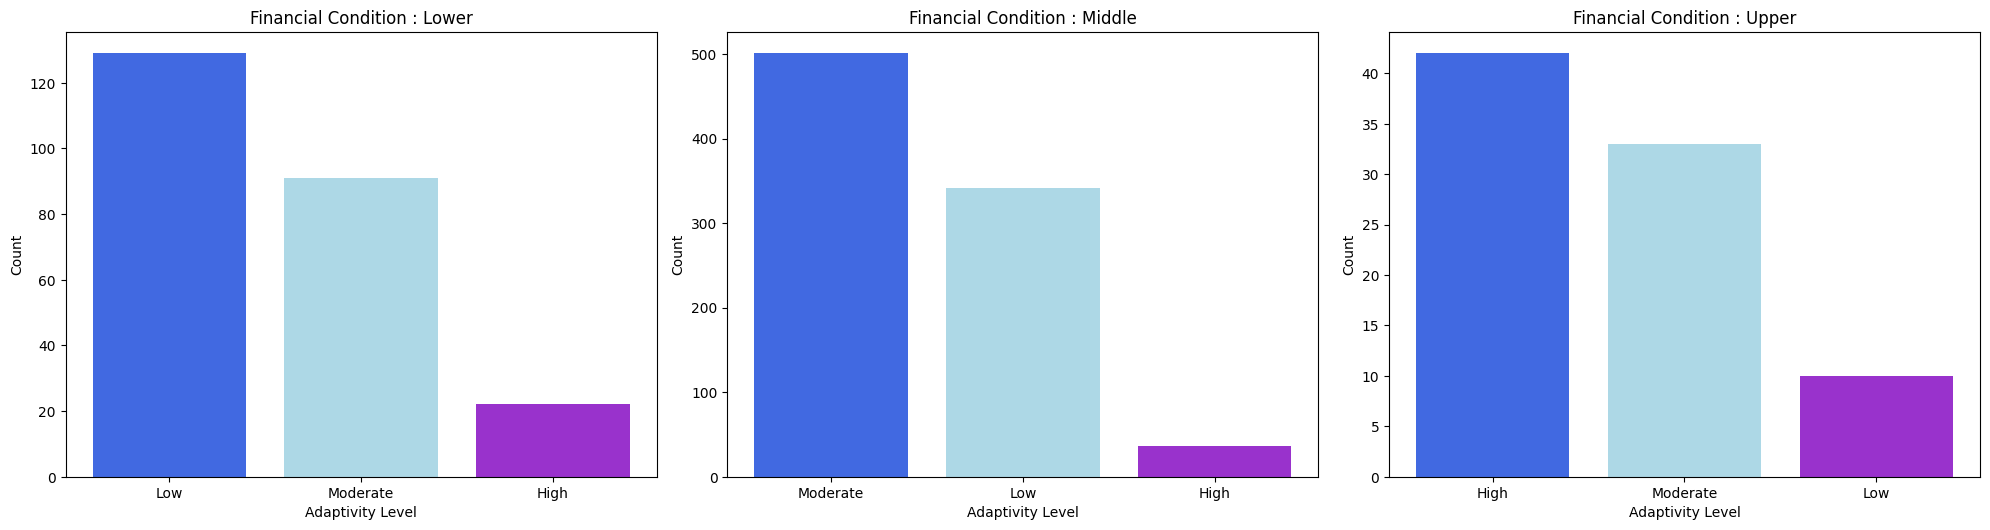

In [13]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Financial Condition"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Financial Condition"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Financial Condition : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

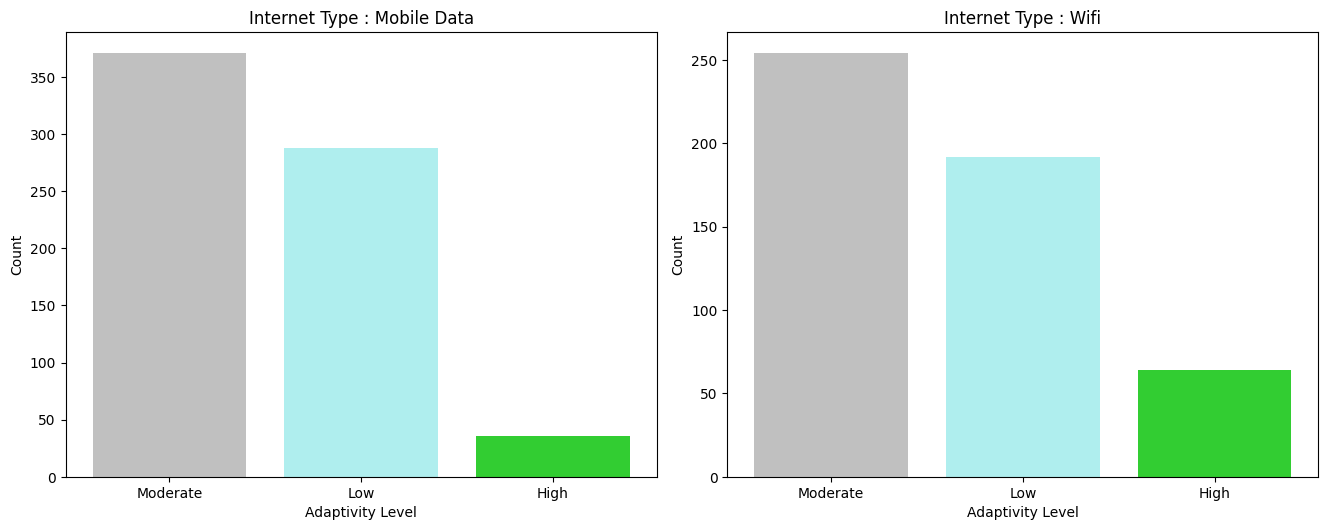

In [14]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Internet Type"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Internet Type"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Internet Type : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

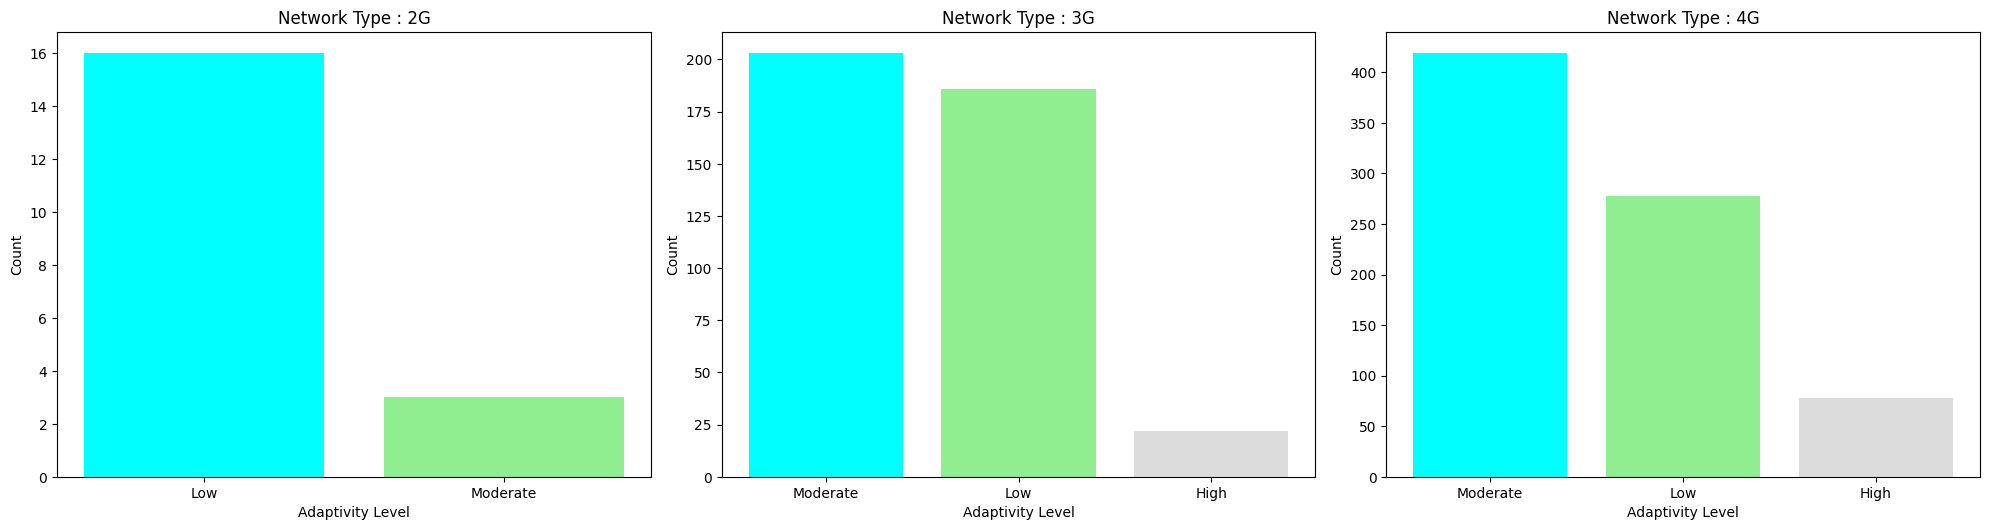

In [15]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Network Type"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Network Type"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Network Type : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

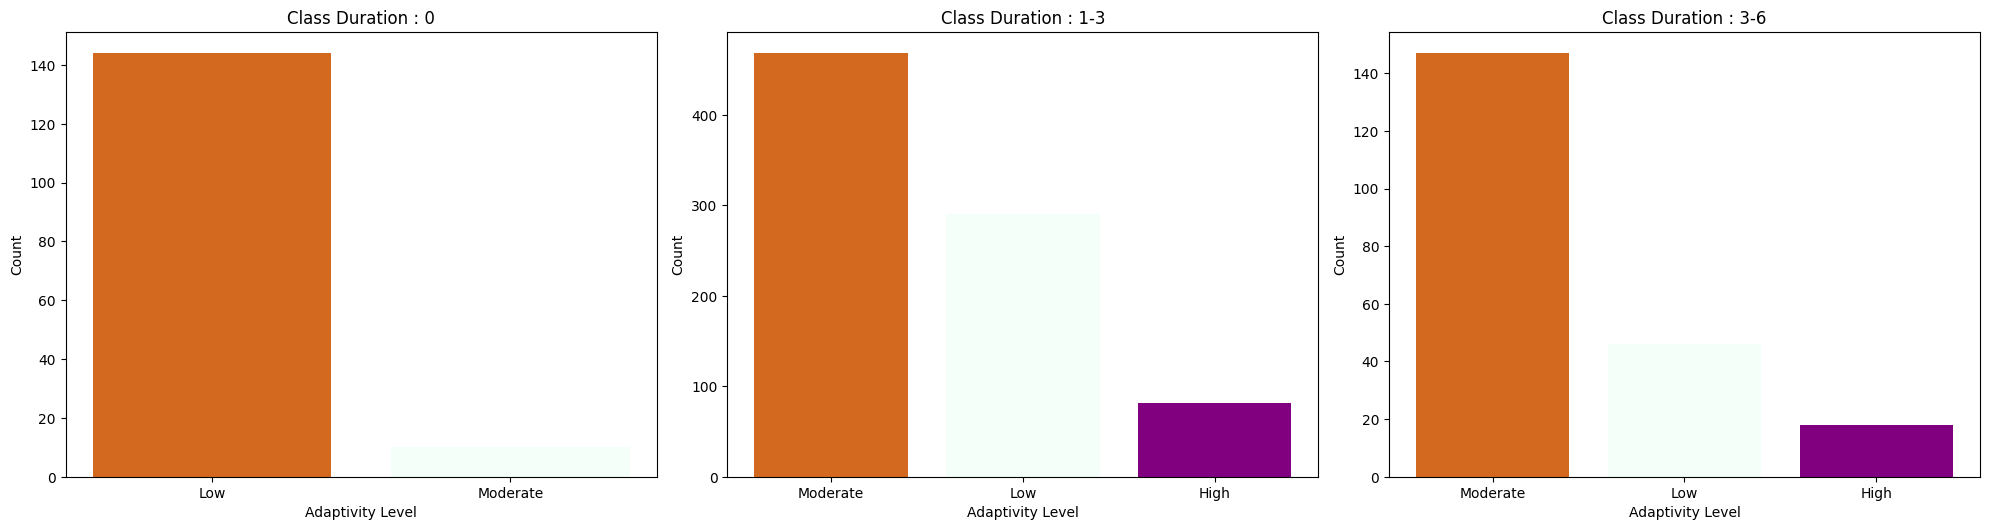

In [16]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Class Duration"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Class Duration"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Class Duration : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

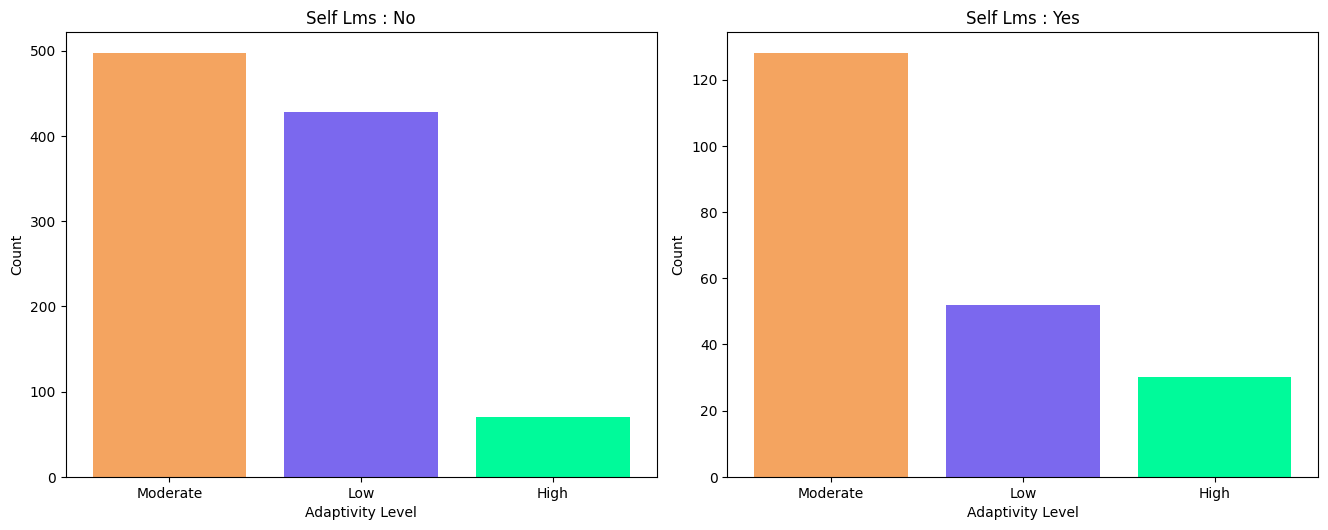

In [17]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Self Lms"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Self Lms"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Self Lms : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

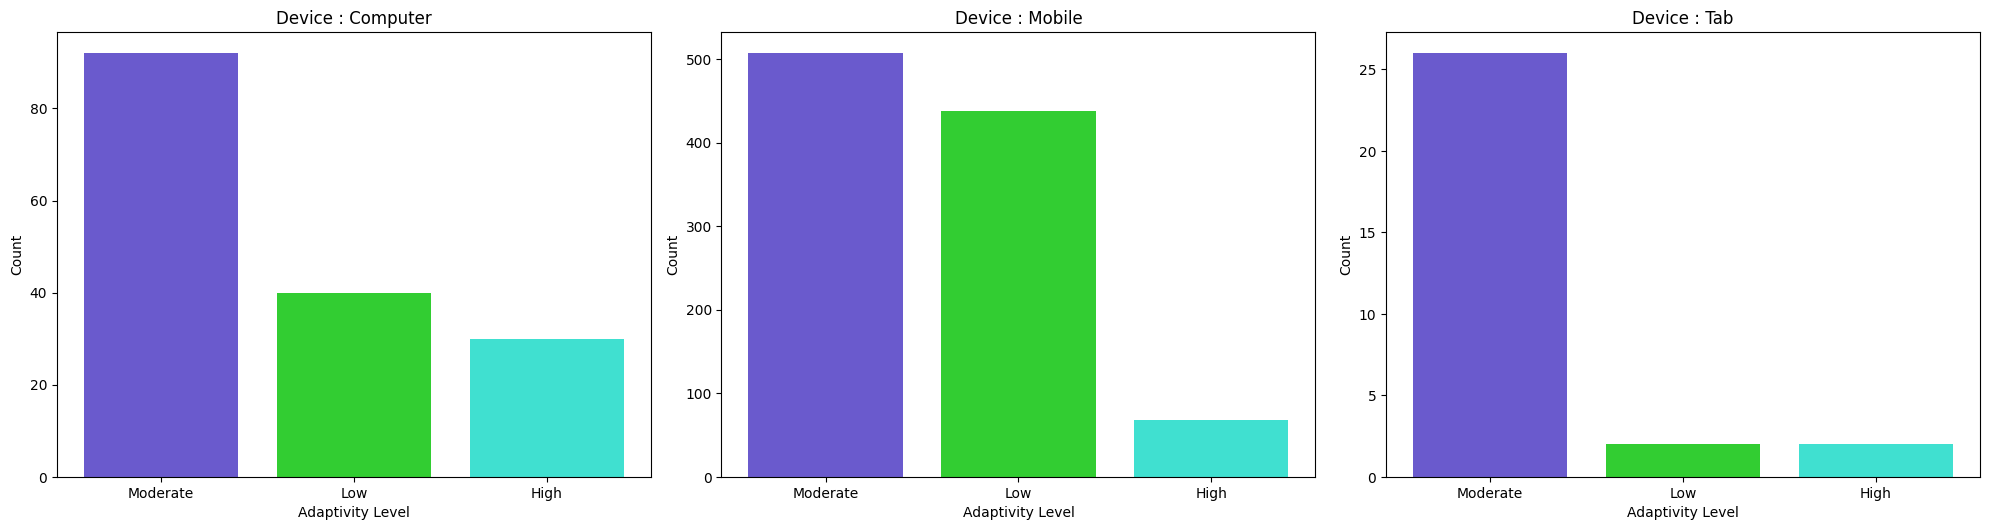

In [18]:
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Device"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Device"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Device : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()